In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [282]:
df=pd.read_csv("customer_churn_raw.csv")

In [283]:
df

,customer_id,age,gender,city,income,signup_date,last_login,plan,monthly_usage_gb,support_tickets,churned,notes
0,1001,25.0,Male,Karachi,55000,2023-01-12,2024-02-10,Premium,120,1,0,Good customer
1,1002,31.0,Female,Lahore,72000,12/03/2023,2024-02-01,Basic,45,3,1,late payer
2,1003,NaN,Male,Islamabad,68000,2023/02/01,2024-01-28,standard,60,2,0,NaN
3,1004,22.0,F,Karachi,?,2023-05-20,2024-02-14,Basic,15,5,1,Too many complaints
4,1005,45.0,Male,Karachi,150000,2022-11-02,2023-12-25,Premium,350,0,0,VIP
5,1006,29.0,female,Lahore,64000,2023-06-10,2024-01-05,Standard,75,2,0,NaN
6,1007,52.0,Male,Islamabad,-20000,2023-04-15,2024-02-11,Basic,30,7,1,Bad data?
7,1008,38.0,Female,Karachi,82000,2023-02-28,not_available,Premium,95,1,0,NaN
8,1009,27.0,Male,Karachi,59000,2023-01-18,2024-02-12,Basic,40,2,1,NaN
9,1010,19.0,Female,Lahore,32000,2023-08-01,2024-02-15,Basic,10,6,1,new user


In [284]:
df.shape

(41, 12)

In [285]:
df.isnull().sum()

customer_id          0
age                  2
gender               0
city                 0
income               0
signup_date          0
last_login           0
plan                 0
monthly_usage_gb     0
support_tickets      0
churned              0
notes               33
dtype: int64

In [286]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       41 non-null     int64  
 1   age               39 non-null     float64
 2   gender            41 non-null     str    
 3   city              41 non-null     str    
 4   income            41 non-null     str    
 5   signup_date       41 non-null     str    
 6   last_login        41 non-null     str    
 7   plan              41 non-null     str    
 8   monthly_usage_gb  41 non-null     int64  
 9   support_tickets   41 non-null     int64  
 10  churned           41 non-null     int64  
 11  notes             8 non-null      str    
dtypes: float64(1), int64(4), str(7)
memory usage: 4.0 KB


In [287]:
df['income']=pd.to_numeric(df['income'],errors='coerce')

In [288]:
df['signup_date']=pd.to_datetime(df['signup_date'],errors='coerce')
df['last_login']=pd.to_datetime(df['last_login'],errors='coerce')

In [289]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       41 non-null     int64         
 1   age               39 non-null     float64       
 2   gender            41 non-null     str           
 3   city              41 non-null     str           
 4   income            40 non-null     float64       
 5   signup_date       39 non-null     datetime64[us]
 6   last_login        40 non-null     datetime64[us]
 7   plan              41 non-null     str           
 8   monthly_usage_gb  41 non-null     int64         
 9   support_tickets   41 non-null     int64         
 10  churned           41 non-null     int64         
 11  notes             8 non-null      str           
dtypes: datetime64[us](2), float64(2), int64(4), str(4)
memory usage: 4.0 KB


In [290]:

df['age']=df['age'].fillna(df['age'].median())

In [291]:
df.head()

,customer_id,age,gender,city,income,signup_date,last_login,plan,monthly_usage_gb,support_tickets,churned,notes
0,1001,25.0,Male,Karachi,55000.0,2023-01-12,2024-02-10,Premium,120,1,0,Good customer
1,1002,31.0,Female,Lahore,72000.0,NaT,2024-02-01,Basic,45,3,1,late payer
2,1003,34.0,Male,Islamabad,68000.0,NaT,2024-01-28,standard,60,2,0,NaN
3,1004,22.0,F,Karachi,NaN,2023-05-20,2024-02-14,Basic,15,5,1,Too many complaints
4,1005,45.0,Male,Karachi,150000.0,2022-11-02,2023-12-25,Premium,350,0,0,VIP


In [292]:
df['notes']=df['notes'].fillna('no comments')

In [293]:
df.isnull().sum()

customer_id         0
age                 0
gender              0
city                0
income              1
signup_date         2
last_login          1
plan                0
monthly_usage_gb    0
support_tickets     0
churned             0
notes               0
dtype: int64

In [294]:
df.duplicated().sum()

np.int64(0)

In [295]:
#after cleaning anylayez the data 
#brek into 4 gorups
#numerical numeriacal
#numerical categorial
#categorial categorial
#date time

In [296]:
df["churned"].value_counts()

churned
0    26
1    15
Name: count, dtype: int64

In [297]:
df.describe()

,customer_id,age,income,signup_date,last_login,monthly_usage_gb,support_tickets,churned
count,41.000000,41.000000,40.000000,39,40,41.000000,41.000000,41.000000
mean,1020.024390,35.536585,81000.000000,2023-03-12 08:36:55.384615,2024-02-02 13:48:00,105.243902,2.195122,0.365854
min,1001.000000,19.000000,-20000.000000,2022-08-10 00:00:00,2023-12-25 00:00:00,9.000000,0.000000,0.000000
25%,1010.000000,27.000000,58750.000000,2023-01-15 00:00:00,2024-01-28 00:00:00,40.000000,1.000000,0.000000
50%,1020.000000,34.000000,71000.000000,2023-03-09 00:00:00,2024-02-05 12:00:00,72.000000,2.000000,0.000000
75%,1030.000000,42.000000,90250.000000,2023-05-22 12:00:00,2024-02-12 00:00:00,120.000000,3.000000,1.000000
max,1040.000000,61.000000,200000.000000,2023-09-01 00:00:00,2024-02-16 00:00:00,400.000000,7.000000,1.000000
std,11.938358,11.086247,42425.198124,NaN,NaN,98.756969,1.926389,0.487652


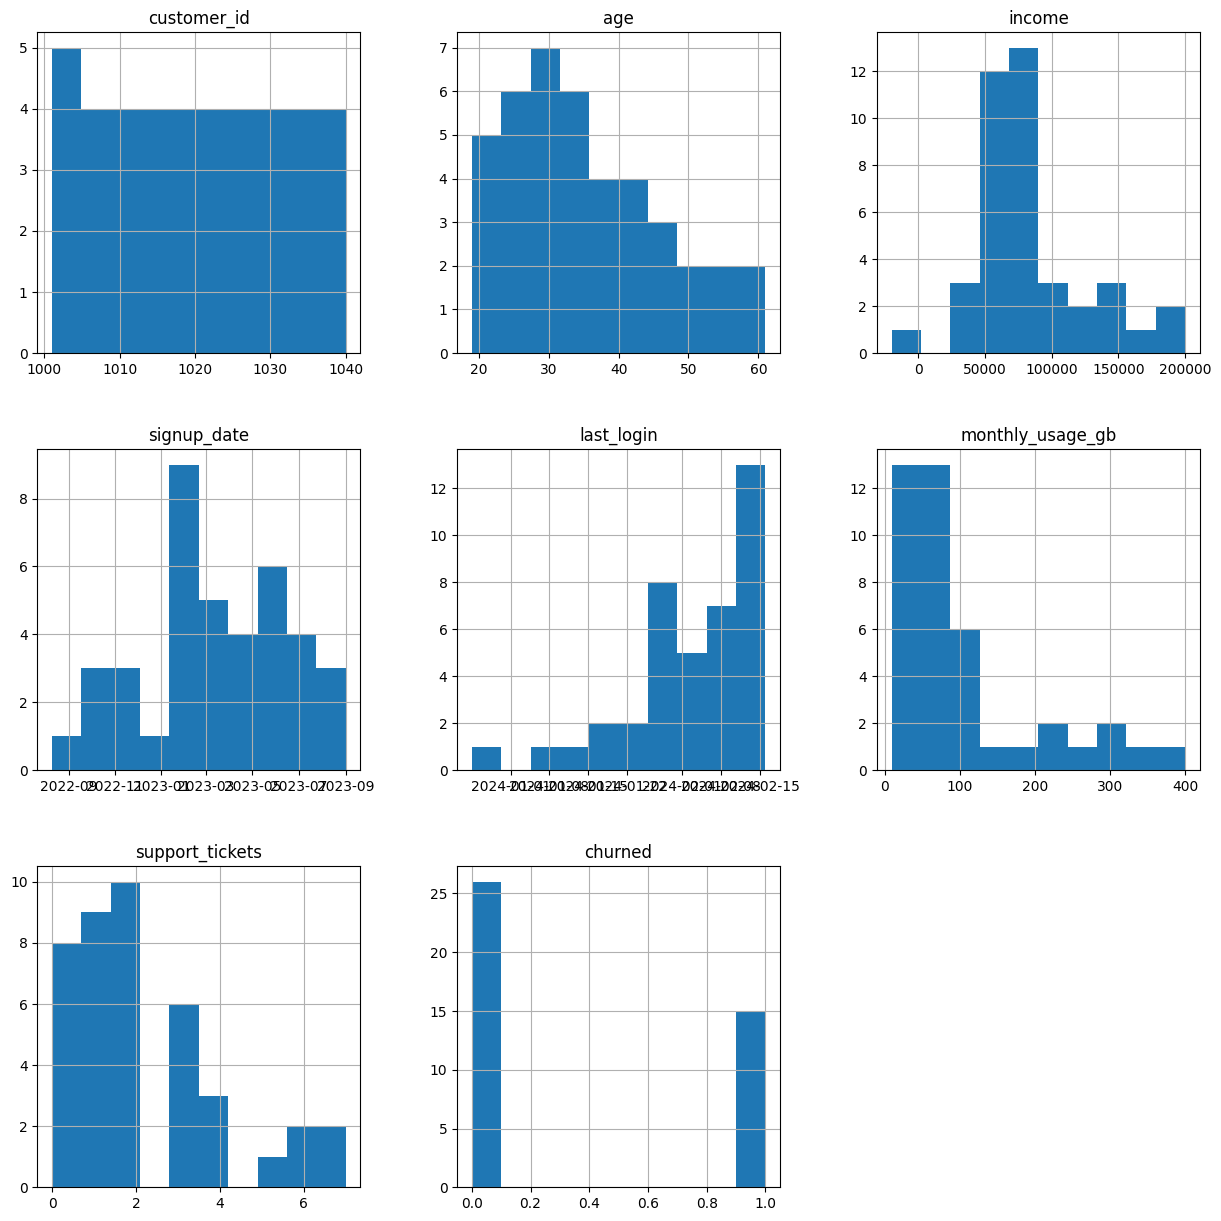

In [298]:

#most important step total anylyze the data
df.hist(figsize=(15,15))
plt.show()

In [299]:
#removing outliers
df = df[df["income"] > 0]


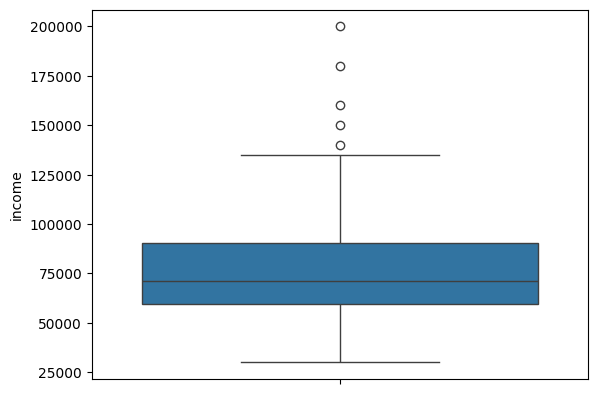

In [300]:
#LOOK FOR OUTLIERS
x=df['income'].value_counts()
sns.boxplot(df['income'])
plt.show()

In [301]:
#Numerical vs Target
df.groupby("churned")["income"].mean()


churned
0    97576.923077
1    55615.384615
Name: income, dtype: float64

In [302]:
df.groupby("churned")["monthly_usage_gb"].mean()


churned
0    148.038462
1     32.384615
Name: monthly_usage_gb, dtype: float64

In [303]:
df.groupby("churned")["support_tickets"].mean()

churned
0    1.076923
1    3.846154
Name: support_tickets, dtype: float64

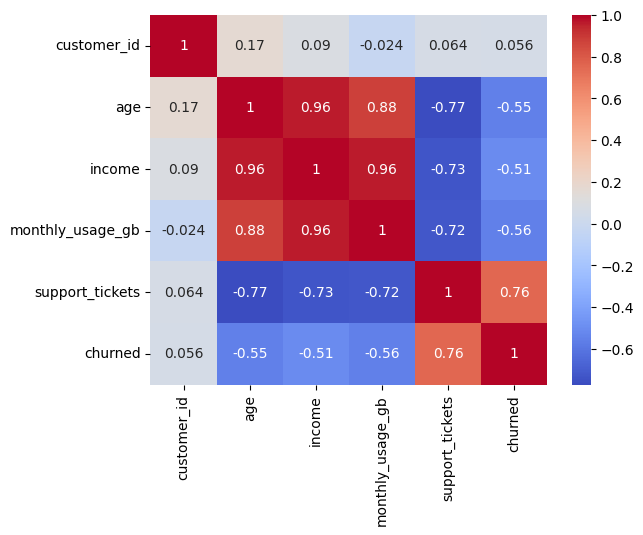

In [304]:
# Red tones → positive correlation

# Blue tones → negative correlation

# White/light colors → near zero correlation

sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm",annot=True)
plt.show()

In [305]:
df.head()

,customer_id,age,gender,city,income,signup_date,last_login,plan,monthly_usage_gb,support_tickets,churned,notes
0,1001,25.0,Male,Karachi,55000.0,2023-01-12,2024-02-10,Premium,120,1,0,Good customer
1,1002,31.0,Female,Lahore,72000.0,NaT,2024-02-01,Basic,45,3,1,late payer
2,1003,34.0,Male,Islamabad,68000.0,NaT,2024-01-28,standard,60,2,0,no comments
4,1005,45.0,Male,Karachi,150000.0,2022-11-02,2023-12-25,Premium,350,0,0,VIP
5,1006,29.0,female,Lahore,64000.0,2023-06-10,2024-01-05,Standard,75,2,0,no comments


In [306]:
df2 = df.drop(columns=['notes'])


In [307]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("customer_churn_raw.csv")
df2=df.copy()
le=LabelEncoder()
df2['plan']=le.fit_transform(df2['plan'])


In [308]:
df2['gender']=le.fit_transform(df2['gender'])

In [309]:
df2['age']=df2['age'].fillna('other')

In [310]:
df2.isnull().sum()

customer_id          0
age                  0
gender               0
city                 0
income               0
signup_date          0
last_login           0
plan                 0
monthly_usage_gb     0
support_tickets      0
churned              0
notes               33
dtype: int64

In [311]:
df2.head()

,customer_id,age,gender,city,income,signup_date,last_login,plan,monthly_usage_gb,support_tickets,churned,notes
0,1001,25.0,2,Karachi,55000,2023-01-12,2024-02-10,1,120,1,0,Good customer
1,1002,31.0,1,Lahore,72000,12/03/2023,2024-02-01,0,45,3,1,late payer
2,1003,other,2,Islamabad,68000,2023/02/01,2024-01-28,3,60,2,0,NaN
3,1004,22.0,0,Karachi,?,2023-05-20,2024-02-14,0,15,5,1,Too many complaints
4,1005,45.0,2,Karachi,150000,2022-11-02,2023-12-25,1,350,0,0,VIP


In [314]:
one_hot=pd.get_dummies(df2,columns=['city'],prefix='city',dtype=int)

In [ ]:




one_hot


,customer_id,age,gender,income,signup_date,last_login,plan,monthly_usage_gb,support_tickets,churned,notes,city_ Karachi,city_Islamabad,city_Karachi,city_Lahore
0,1001,25.0,2,55000,2023-01-12,2024-02-10,1,120,1,0,Good customer,0,0,1,0
1,1002,31.0,1,72000,12/03/2023,2024-02-01,0,45,3,1,late payer,0,0,0,1
2,1003,other,2,68000,2023/02/01,2024-01-28,3,60,2,0,NaN,0,1,0,0
3,1004,22.0,0,?,2023-05-20,2024-02-14,0,15,5,1,Too many complaints,0,0,1,0
4,1005,45.0,2,150000,2022-11-02,2023-12-25,1,350,0,0,VIP,0,0,1,0
5,1006,29.0,3,64000,2023-06-10,2024-01-05,2,75,2,0,NaN,0,0,0,1
6,1007,52.0,2,-20000,2023-04-15,2024-02-11,0,30,7,1,Bad data?,0,1,0,0
7,1008,38.0,1,82000,2023-02-28,not_available,1,95,1,0,NaN,0,0,1,0
8,1009,27.0,2,59000,2023-01-18,2024-02-12,0,40,2,1,NaN,1,0,0,0
9,1010,19.0,1,32000,2023-08-01,2024-02-15,0,10,6,1,new user,0,0,0,1
